In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df=pd.read_csv('/content/mushroom_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


SVM Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59      4909
           1       0.66      0.70      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.64      0.64      0.64     10807
weighted avg       0.64      0.64      0.64     10807



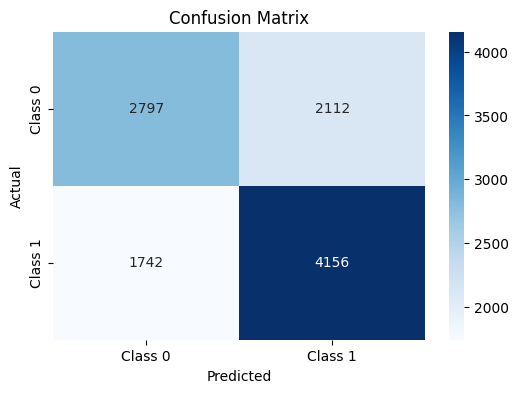

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('class', axis=1)  # Replace 'class' with the target column name
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Use kernel='rbf' for non-linear data
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Accuracy: 0.64

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



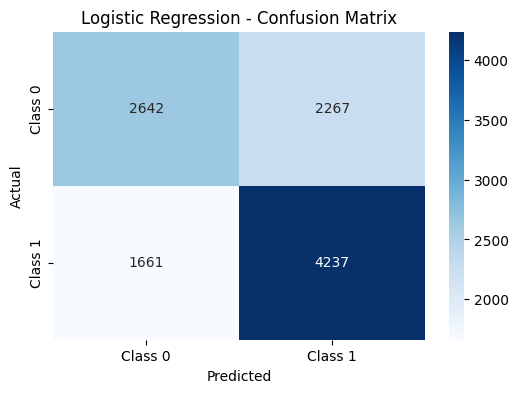

Decision Tree Accuracy: 0.98

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



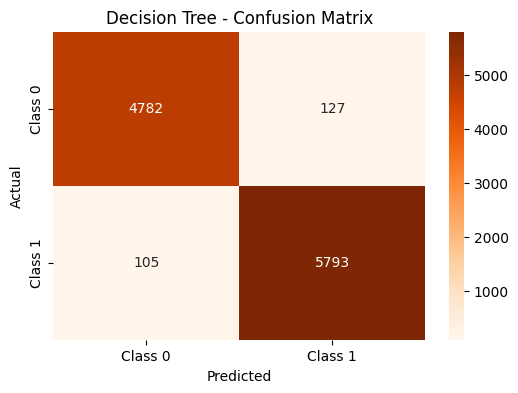

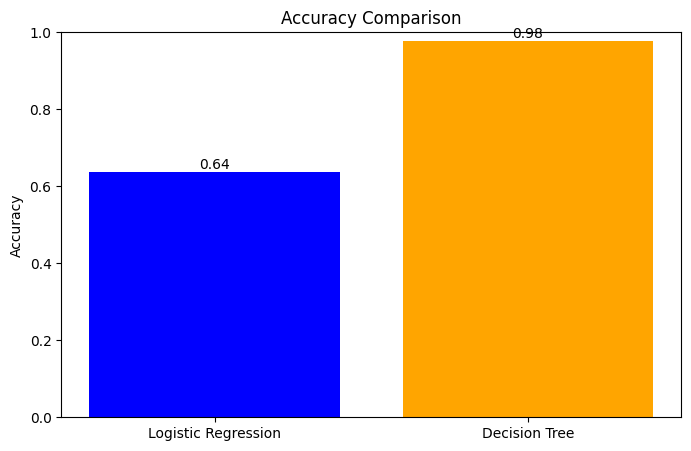

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
accuracy_scores = {}

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, lr_pred)
accuracy_scores['Logistic Regression'] = lr_accuracy

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
accuracy_scores['Decision Tree'] = dt_accuracy

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare accuracies
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6901 - loss: 0.5761 - val_accuracy: 0.8114 - val_loss: 0.4384
Epoch 2/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8213 - loss: 0.4081 - val_accuracy: 0.8745 - val_loss: 0.3181
Epoch 3/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8720 - loss: 0.3094 - val_accuracy: 0.8995 - val_loss: 0.2613
Epoch 4/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9036 - loss: 0.2502 - val_accuracy: 0.9076 - val_loss: 0.2416
Epoch 5/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9240 - loss: 0.2101 - val_accuracy: 0.9270 - val_loss: 0.2012
Epoch 6/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9339 - loss: 0.1861 - val_accuracy: 0.9384 - val_loss: 0.1730
Epoch 7/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9444 - loss: 0.1642 - val_accuracy: 0.9463 - val_loss: 0.1574
Epoch 8/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9490 - loss: 0.1496 - 

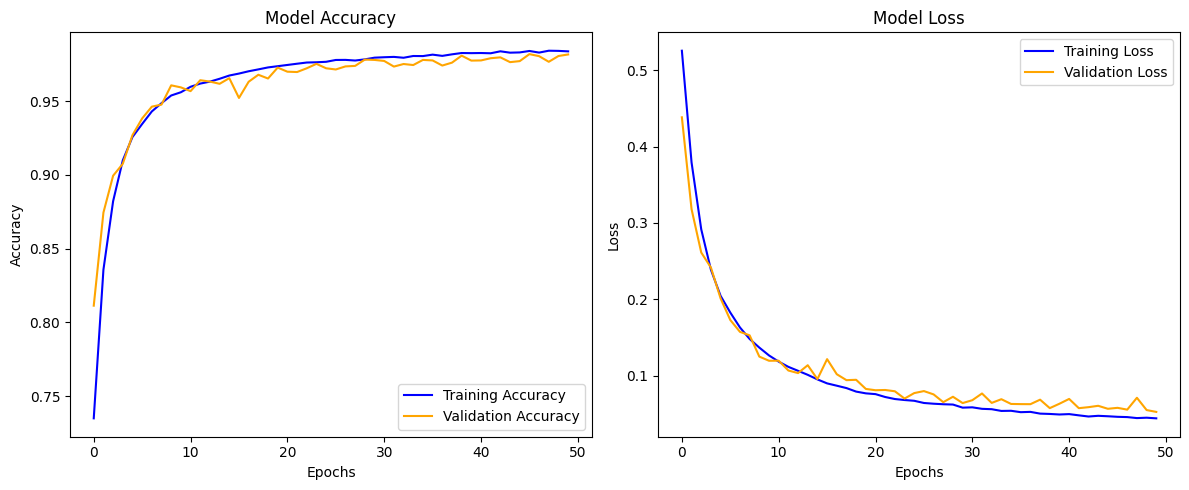

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


By comparing the accuracy for machine learning model and deep learning model it can be concluded that deep learning model has more accuracy.